<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/embedded_methods_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Embedded method of feature selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [6]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [7]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## using Lasso

In [8]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train , y_train)

Lasso(alpha=0.1)

In [9]:
lasso.coef_

array([ 0.        ,  0.1267733 , -0.        ,  0.        ,  0.        ,
        0.00480181,  0.        ,  0.        ])

<Axes: >

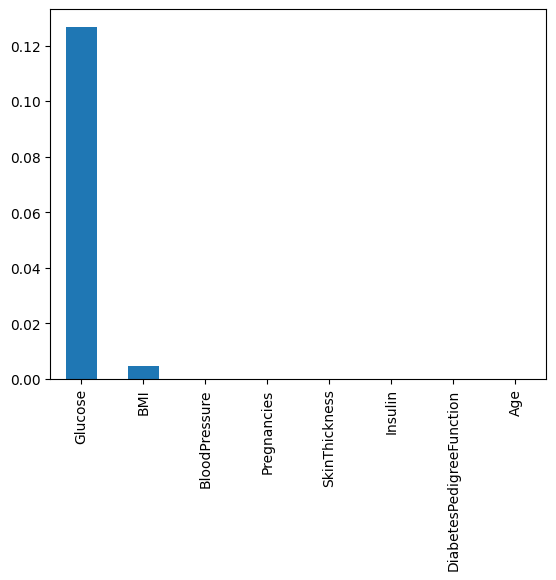

In [10]:
# plot the importance score vs feature
x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

## Decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
dt.feature_importances_

array([0.07331231, 0.29102501, 0.08986879, 0.04742159, 0.04733148,
       0.20086546, 0.13435323, 0.11582214])

<Axes: >

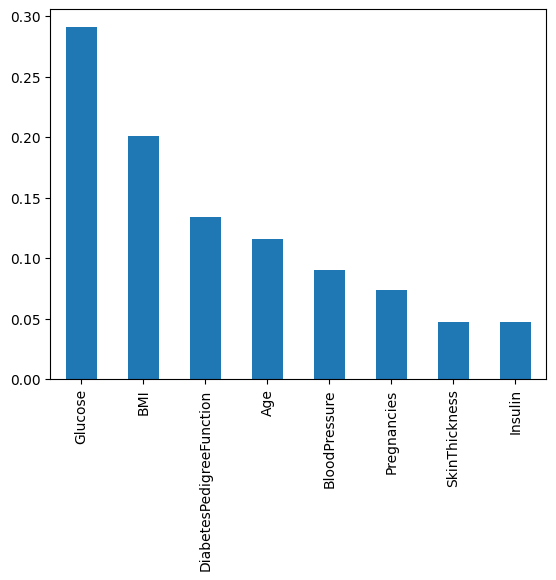

In [13]:
x = pd.Series(np.abs(dt.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

## Random forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
rf.feature_importances_

array([0.08839782, 0.24623451, 0.09081958, 0.07171128, 0.08079874,
       0.16664735, 0.11867463, 0.13671608])

<Axes: >

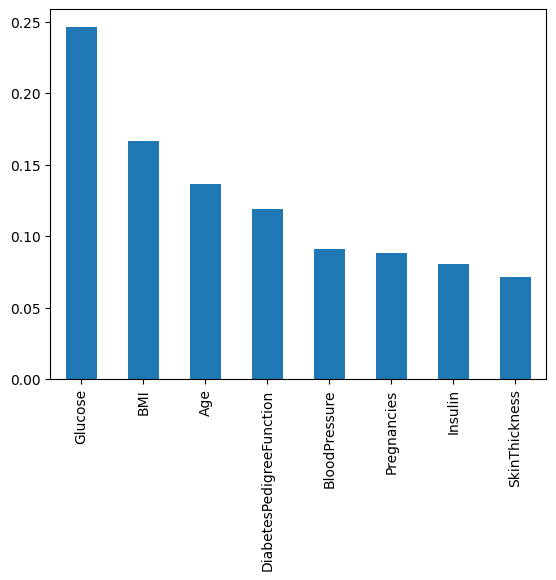

In [16]:
x = pd.Series(np.abs(rf.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

In [17]:
# all the models used , show that Glucose and BMI are important features

SelectFromModel: more formal way of feature selection using models.bettter than manually applying the models

In [18]:
from sklearn.feature_selection import SelectFromModel
model = DecisionTreeClassifier()
sfm = SelectFromModel(model,threshold='mean')
sfm.fit(X_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [19]:
sfm.get_support(indices=True)

array([1, 5, 7])

##recursive feature elimination

In [ ]:
# finding the best feature from the iris dataset using recursive feature elimination

In [20]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
X = df.drop(columns='species')

In [22]:
y = df['species']

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [26]:
from sklearn.ensemble import  RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
rf.feature_importances_

array([0.07921421, 0.02677389, 0.4412014 , 0.4528105 ])

In [28]:
X_train_1 = X_train.drop(columns='sepal_length')

In [29]:
X_train_1

,sepal_width,petal_length,petal_width
91,3.0,4.6,1.4
135,3.0,6.1,2.3
69,2.5,3.9,1.1
128,2.8,5.6,2.1
114,2.8,5.1,2.4
...,...,...,...
133,2.8,5.1,1.5
137,3.1,5.5,1.8
72,2.5,4.9,1.5
140,3.1,5.6,2.4


In [30]:
rf.fit(X_train_1,y_train)

RandomForestClassifier()

In [31]:
rf.feature_importances_

array([0.11596848, 0.39692972, 0.4871018 ])

In [32]:
X_train_2 = X_train_1.drop(columns = 'sepal_width')

In [34]:
rf.fit(X_train_2,y_train)

RandomForestClassifier()

In [35]:
rf.feature_importances_

array([0.47861749, 0.52138251])

In [36]:
X_train_2

,petal_length,petal_width
91,4.6,1.4
135,6.1,2.3
69,3.9,1.1
128,5.6,2.1
114,5.1,2.4
...,...,...
133,5.1,1.5
137,5.5,1.8
72,4.9,1.5
140,5.6,2.4


In [37]:
X_train_3 = X_train_2.drop(columns='petal_length')

In [41]:
X_train_3

,petal_width
91,1.4
135,2.3
69,1.1
128,2.1
114,2.4
...,...
133,1.5
137,1.8
72,1.5
140,2.4


## to do this driectly use: sklearn RFE


In [53]:
model = RandomForestClassifier(random_state=1)    # changing the random state changes the output ranking
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X_train, y_train)

ranking = rfe.ranking_
print("RFE Ranking:")
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {ranking[i]}")


RFE Ranking:
sepal_length: 3
sepal_width: 4
petal_length: 2
petal_width: 1


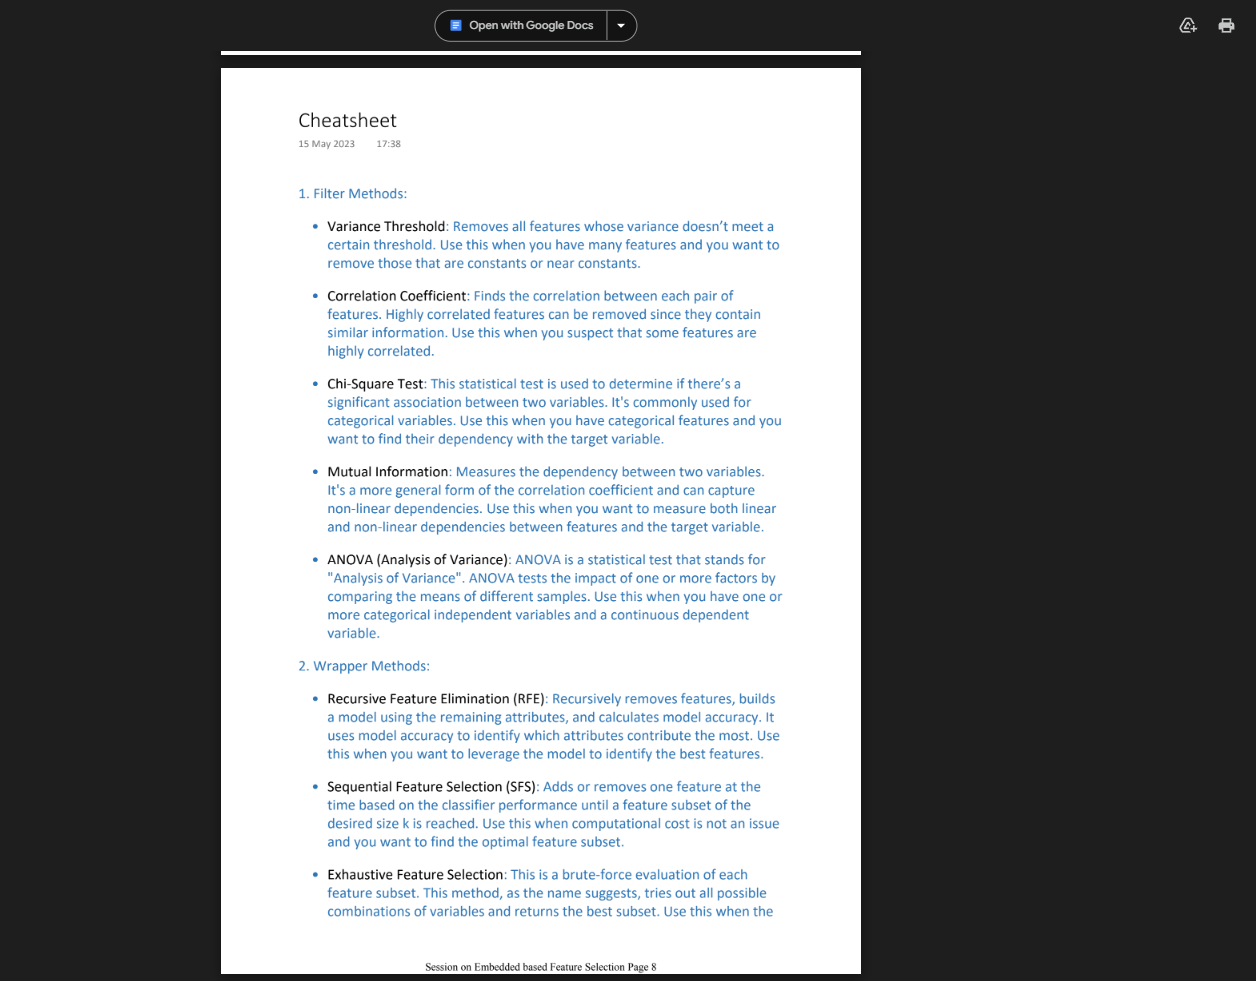

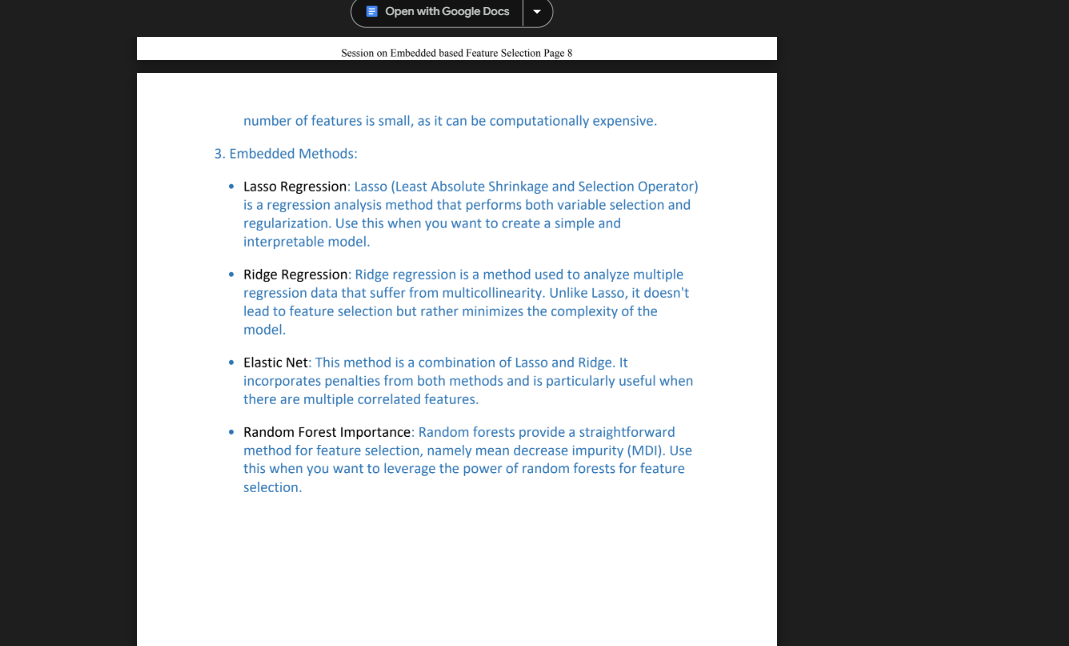